In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

## ALL masses together

In [24]:
################
# NOW FOR ee #
################

mZprime_ee=[2.5,3.5,4.5,5,5.5,6.5,7.5,8.5]


# LOAD THE RESULTS FOR EACH m_Z'
results2500_ee = np.loadtxt('saved-models/results2500GeV-ee.txt')
results3500_ee = np.loadtxt('saved-models/results3500GeV-ee.txt')
results4500_ee = np.loadtxt('saved-models/results4500GeV-ee.txt')
results5000_ee = np.loadtxt('saved-models/results5000GeV-ee.txt')
results5500_ee = np.loadtxt('saved-models/results5500GeV-ee.txt')
results6500_ee = np.loadtxt('saved-models/results6500GeV-ee.txt')
results7500_ee = np.loadtxt('saved-models/results7500GeV-ee.txt')
results8500_ee = np.loadtxt('saved-models/results8500GeV-ee.txt')


allresults = {'results2500_ee':results2500_ee, 'results3500_ee':results3500_ee, 'results4500_ee':results4500_ee, 'results5000_ee':results5000_ee, 'results5500_ee':results5500_ee, 'results6500_ee':results6500_ee, 'results7500_ee':results7500_ee, 'results8500_ee':results8500_ee}

all_cross_bins_logbins_95CL_ee = []
all_cross_bins_XG_95CL_ee = []
all_cross_XG_MLL_95CL_ee = []
all_cross_bins_XG_1ML_95CL_ee = []
all_cross_XG_MLL_1ML_95CL_ee = []
all_cross_BL_CV0_zeros_95CL_ee = []
all_cross_BL_CV0_poiss_zeros_95CL_ee = []
all_cross_BL_CV1_zeros_95CL_ee = []
all_cross_BL_CV1_poiss_zeros_95CL_ee = []
all_cross_BL_CV2_zeros_95CL_ee = []
all_cross_BL_CV2_poiss_zeros_95CL_ee = []


for i in range(len(mZprime_ee)):
    all_cross_bins_logbins_95CL_ee.append(allresults['results'+str( int(mZprime_ee[i]*1000) )+'_ee'][0])
    all_cross_bins_XG_95CL_ee.append(allresults['results'+str( int(mZprime_ee[i]*1000) )+'_ee'][1])
    all_cross_XG_MLL_95CL_ee.append(allresults['results'+str( int(mZprime_ee[i]*1000) )+'_ee'][2])
    all_cross_bins_XG_1ML_95CL_ee.append(allresults['results'+str( int(mZprime_ee[i]*1000) )+'_ee'][3])
    all_cross_XG_MLL_1ML_95CL_ee.append(allresults['results'+str( int(mZprime_ee[i]*1000) )+'_ee'][4])
    all_cross_BL_CV0_zeros_95CL_ee.append(allresults['results'+str( int(mZprime_ee[i]*1000) )+'_ee'][20])
    all_cross_BL_CV0_poiss_zeros_95CL_ee.append(allresults['results'+str( int(mZprime_ee[i]*1000) )+'_ee'][24])
    all_cross_BL_CV1_zeros_95CL_ee.append(allresults['results'+str( int(mZprime_ee[i]*1000) )+'_ee'][25])
    all_cross_BL_CV1_poiss_zeros_95CL_ee.append(allresults['results'+str( int(mZprime_ee[i]*1000) )+'_ee'][29])
    all_cross_BL_CV2_zeros_95CL_ee.append(allresults['results'+str( int(mZprime_ee[i]*1000) )+'_ee'][30])
    all_cross_BL_CV2_poiss_zeros_95CL_ee.append(allresults['results'+str( int(mZprime_ee[i]*1000) )+'_ee'][34])

    
    
print(all_cross_bins_logbins_95CL_ee)
print(all_cross_bins_XG_95CL_ee)
print(all_cross_XG_MLL_95CL_ee)
print(all_cross_bins_XG_1ML_95CL_ee)
print(all_cross_XG_MLL_1ML_95CL_ee)
print(all_cross_BL_CV0_zeros_95CL_ee)
print(all_cross_BL_CV0_poiss_zeros_95CL_ee)
print(all_cross_BL_CV1_zeros_95CL_ee)
print(all_cross_BL_CV1_poiss_zeros_95CL_ee)
print(all_cross_BL_CV2_zeros_95CL_ee)
print(all_cross_BL_CV2_poiss_zeros_95CL_ee)

[1.6859656831862418e-05, 5.574754602612445e-06, 2.607508774883415e-06, 2.3352071875010213e-06, 1.5194072331914128e-06, 1.4258756793294286e-06, 2.273960508252129e-06, 5.500231040523743e-06]
[1.358706003907691e-05, 5.812519260281676e-06, 3.3678041475282365e-06, 2.9338881425778738e-06, 2.8254813482095043e-06, 3.7214904191307183e-06, 6.24040863149373e-06, 1.102729452183933e-05]
[1.3109705872353094e-05, 5.055694000462992e-06, 3.969505019539038e-06, 2.4797946411992907e-06, 1.4813172793290873e-06, 1.3574879015108606e-06, 3.0550651266110022e-06, 3.535911206902037e-06]
[1.3772661490252164e-05, 5.852996724236219e-06, 3.393473130347319e-06, 2.97327404157413e-06, 2.8710655746707787e-06, 3.7573447205583938e-06, 6.335001114144981e-06, 1.1332551725181396e-05]
[1.0041628545238903e-05, 4.730213417482717e-06, 4.183413335587395e-06, 2.5596493067934483e-06, 1.4470514397775881e-06, 1.3158651414931356e-06, 2.999921147772578e-06, 3.8672320422288564e-06]
[1.4065941130485167e-05, 5.627366372352802e-06, 2.86255

In [3]:
################
# NOW FOR MUMU #
################

mZprime_mumu=[2.5,3.5,4.5,5,5.5,6.5,7.5,8.5]


# LOAD THE RESULTS FOR EACH m_Z'
results2500_mumu = np.loadtxt('saved-models/results2500GeV-mumu.txt')
results3500_mumu = np.loadtxt('saved-models/results3500GeV-mumu.txt')
results4500_mumu = np.loadtxt('saved-models/results4500GeV-mumu.txt')
results5000_mumu = np.loadtxt('saved-models/results5000GeV-mumu.txt')
results5500_mumu = np.loadtxt('saved-models/results5500GeV-mumu.txt')
results6500_mumu = np.loadtxt('saved-models/results6500GeV-mumu.txt')
results7500_mumu = np.loadtxt('saved-models/results7500GeV-mumu.txt')
results8500_mumu = np.loadtxt('saved-models/results8500GeV-mumu.txt')


allresults = {'results2500_mumu':results2500_mumu, 'results3500_mumu':results3500_mumu, 'results4500_mumu':results4500_mumu, 'results5000_mumu':results5000_mumu, 'results5500_mumu':results5500_mumu, 'results6500_mumu':results6500_mumu, 'results7500_mumu':results7500_mumu, 'results8500_mumu':results8500_mumu}

all_cross_bins_logbins_95CL_mumu = []
all_cross_bins_XG_95CL_mumu = []
all_cross_XG_MLL_95CL_mumu = []
all_cross_bins_XG_1ML_95CL_mumu = []
all_cross_XG_MLL_1ML_95CL_mumu = []


for i in range(len(mZprime_mumu)):
    all_cross_bins_logbins_95CL_mumu.append(allresults['results'+str( int(mZprime_mumu[i]*1000) )+'_mumu'][0])
    all_cross_bins_XG_95CL_mumu.append(allresults['results'+str( int(mZprime_mumu[i]*1000) )+'_mumu'][1])
    all_cross_XG_MLL_95CL_mumu.append(allresults['results'+str( int(mZprime_mumu[i]*1000) )+'_mumu'][2])
    all_cross_bins_XG_1ML_95CL_mumu.append(allresults['results'+str( int(mZprime_mumu[i]*1000) )+'_mumu'][3])
    all_cross_XG_MLL_1ML_95CL_mumu.append(allresults['results'+str( int(mZprime_mumu[i]*1000) )+'_mumu'][4])

    
    
print(all_cross_bins_logbins_95CL_mumu)
print(all_cross_bins_XG_95CL_mumu)
print(all_cross_XG_MLL_95CL_mumu)
print(all_cross_bins_XG_1ML_95CL_mumu)
print(all_cross_XG_MLL_1ML_95CL_mumu)

[2.4317682890078084e-05, 8.238629525025272e-06, 4.158438697078762e-06, 3.323803746985959e-06, 2.358313961068487e-06, 2.127366028925083e-06, 3.3961949877031613e-06, 7.491516851437404e-06]
[2.0794963112864933e-05, 8.879497379734537e-06, 4.8968062465647155e-06, 4.26495109719263e-06, 4.025363993154653e-06, 5.08468550303696e-06, 8.653186998500035e-06, 1.522361125341981e-05]
[2.084122586679323e-05, 1.003254630601588e-05, 4.298289278823684e-06, 2.5996838916761703e-06, 2.6663132183275503e-06, 1.8345226360456417e-06, 2.157445187730848e-06, 7.016320127170977e-06]
[2.1006844205073585e-05, 8.911393633168099e-06, 4.923822776546349e-06, 4.26615641032588e-06, 4.079213814445891e-06, 5.1437235495598746e-06, 8.834718425530782e-06, 1.560341109457116e-05]
[1.9686994657834115e-05, 8.465688294400671e-06, 3.4636009589574116e-06, 2.5404299354591856e-06, 2.758763741527804e-06, 1.7094292355773332e-06, 2.213989675479557e-06, 6.744649466319825e-06]


In [6]:
# Some parameters
corect_k_factor = 0.7
k_factor = 3 * corect_k_factor

print('k factor: ' , k_factor)

k factor:  2.0999999999999996


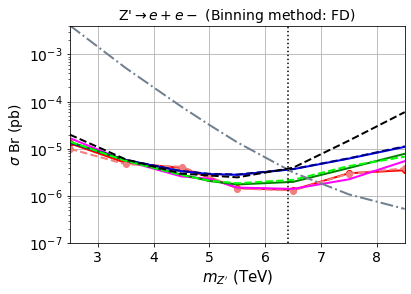

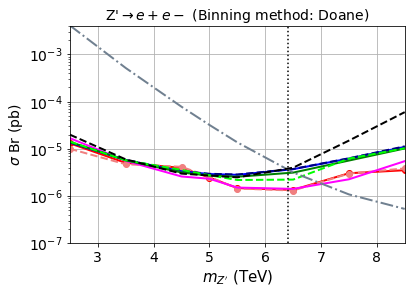

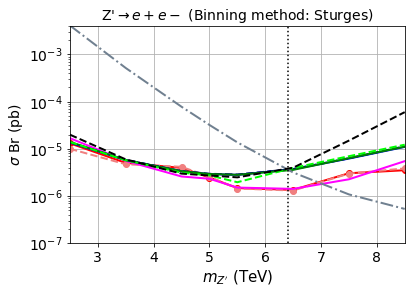

In [25]:
# Other parameters
madgraph_theory = [4.82e-3,6.095e-4,9.475e-5,3.97e-5,1.74e-5,4.22e-6,1.5e-6,7.3e-7] # for the dataset generated with m_{ll}>1800GeV
acceptance = [0.40439,0.402948,0.392072,0.385648,0.376202,0.35764,0.34562,0.35] # for the dataset generated with m_{ll}>1800GeV
eff_cross_madgraph_ee = [ k_factor * a * b for a,b in zip(madgraph_theory,acceptance)]

# From ATLAS
mZprime_ee_ATLAS=[2.5,3.5,4.5,5.5,6.5,7.5,8.5]
ATLAS_cross_95CL_ee = [2e-5,6e-6,3e-6,2.5e-6,4e-6,1.5e-5,6e-5]
ATLAS_cross_95CL_ee = [ 1.0 * a for a in ATLAS_cross_95CL_ee] # correction


plt.figure()
lw = 2

plt.plot(mZprime_ee, all_cross_XG_MLL_95CL_ee, 'o-', color='red', lw=lw, label=r'MLL+KDE (10ML)')
plt.plot(mZprime_ee, all_cross_XG_MLL_1ML_95CL_ee, 'o--', color='lightcoral', lw=lw, label=r'MLL+KDE (10ML)')
plt.plot(mZprime_ee, all_cross_bins_logbins_95CL_ee, '-', color='magenta', lw=lw, label=r'$\bar{x}$ BL (15 log l.bins)') 
plt.plot(mZprime_ee, all_cross_bins_XG_95CL_ee, '-', color='blue', lw=lw, label=r'$o(\bar{x})$ BL (15 l.bins) (10ML)')
plt.plot(mZprime_ee, all_cross_bins_XG_1ML_95CL_ee, '--', color='navy', lw=lw, label=r'$o(\bar{x})$ BL (15 l.bins) (1ML)')
plt.plot(mZprime_ee, all_cross_BL_CV0_zeros_95CL_ee, '-', color='green', lw=lw, label=r'$o(\bar{x})$ BL eq. bin width (10ML)')
plt.plot(mZprime_ee, all_cross_BL_CV0_poiss_zeros_95CL_ee, '--', color='lime', lw=lw, label=r'$o(\bar{x})$ BL non eq. bin width (10ML)')
plt.plot(mZprime_ee, eff_cross_madgraph_ee, '-.', color='slategray', lw=lw, label=r'MG $\sigma_{eff}$ theory')
plt.plot(mZprime_ee_ATLAS, ATLAS_cross_95CL_ee, '--', color='black', lw=lw, label=r'ATLAS $\sigma$ upper limit')
plt.vlines(x = 6.4, ymin = 1e-7, ymax = 1e-2, linestyles='dotted', color='black', label="ATLAS $m_{Z'}$ upper limit")

plt.title('', fontsize=14)
plt.xlim([2.5, 8.5])
plt.ylim([1e-7, 4e-3])
plt.yscale('log')
plt.xlabel("$m_{Z'}$ (TeV)", fontsize=15)
plt.ylabel('$\sigma$ Br (pb)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r"Z'$\rightarrow e + e-$ (Binning method: FD)",fontsize=14) 
#plt.legend(loc="upper right", fontsize=12)
plt.show()



plt.figure()
lw = 2

plt.plot(mZprime_ee, all_cross_XG_MLL_95CL_ee, 'o-', color='red', lw=lw, label=r'MLL+KDE (10ML)')
plt.plot(mZprime_ee, all_cross_XG_MLL_1ML_95CL_ee, 'o--', color='lightcoral', lw=lw, label=r'MLL+KDE (10ML)')
plt.plot(mZprime_ee, all_cross_bins_logbins_95CL_ee, '-', color='magenta', lw=lw, label=r'$\bar{x}$ BL (15 log l.bins)') 
plt.plot(mZprime_ee, all_cross_bins_XG_95CL_ee, '-', color='blue', lw=lw, label=r'$o(\bar{x})$ BL (15 l.bins) (10ML)')
plt.plot(mZprime_ee, all_cross_bins_XG_1ML_95CL_ee, '--', color='navy', lw=lw, label=r'$o(\bar{x})$ BL (15 l.bins) (1ML)')
plt.plot(mZprime_ee, all_cross_BL_CV1_zeros_95CL_ee, '-', color='green', lw=lw, label=r'$o(\bar{x})$ BL eq. bin width (10ML)')
plt.plot(mZprime_ee, all_cross_BL_CV1_poiss_zeros_95CL_ee, '--', color='lime', lw=lw, label=r'$o(\bar{x})$ BL non eq. bin width (10ML)')
plt.plot(mZprime_ee, eff_cross_madgraph_ee, '-.', color='slategray', lw=lw, label=r'MG $\sigma_{eff}$ theory')
plt.plot(mZprime_ee_ATLAS, ATLAS_cross_95CL_ee, '--', color='black', lw=lw, label=r'ATLAS $\sigma$ upper limit')
plt.vlines(x = 6.4, ymin = 1e-7, ymax = 1e-2, linestyles='dotted', color='black', label="ATLAS $m_{Z'}$ upper limit")

plt.title('', fontsize=14)
plt.xlim([2.5, 8.5])
plt.ylim([1e-7, 4e-3])
plt.yscale('log')
plt.xlabel("$m_{Z'}$ (TeV)", fontsize=15)
plt.ylabel('$\sigma$ Br (pb)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r"Z'$\rightarrow e + e-$ (Binning method: Doane)",fontsize=14) 
#plt.legend(loc="upper right", fontsize=12)
plt.show()




plt.figure()
lw = 2

plt.plot(mZprime_ee, all_cross_XG_MLL_95CL_ee, 'o-', color='red', lw=lw, label=r'MLL+KDE (10ML)')
plt.plot(mZprime_ee, all_cross_XG_MLL_1ML_95CL_ee, 'o--', color='lightcoral', lw=lw, label=r'MLL+KDE (10ML)')
plt.plot(mZprime_ee, all_cross_bins_logbins_95CL_ee, '-', color='magenta', lw=lw, label=r'$\bar{x}$ BL (15 log l.bins)') 
plt.plot(mZprime_ee, all_cross_bins_XG_95CL_ee, '-', color='blue', lw=lw, label=r'$o(\bar{x})$ BL (15 l.bins) (10ML)')
plt.plot(mZprime_ee, all_cross_bins_XG_1ML_95CL_ee, '--', color='navy', lw=lw, label=r'$o(\bar{x})$ BL (15 l.bins) (1ML)')
plt.plot(mZprime_ee, all_cross_BL_CV2_zeros_95CL_ee, '-', color='green', lw=lw, label=r'$o(\bar{x})$ BL eq. bin width (10ML)')
plt.plot(mZprime_ee, all_cross_BL_CV2_poiss_zeros_95CL_ee, '--', color='lime', lw=lw, label=r'$o(\bar{x})$ BL non eq. bin width (10ML)')
plt.plot(mZprime_ee, eff_cross_madgraph_ee, '-.', color='slategray', lw=lw, label=r'MG $\sigma_{eff}$ theory')
plt.plot(mZprime_ee_ATLAS, ATLAS_cross_95CL_ee, '--', color='black', lw=lw, label=r'ATLAS $\sigma$ upper limit')
plt.vlines(x = 6.4, ymin = 1e-7, ymax = 1e-2, linestyles='dotted', color='black', label="ATLAS $m_{Z'}$ upper limit")

plt.title('', fontsize=14)
plt.xlim([2.5, 8.5])
plt.ylim([1e-7, 4e-3])
plt.yscale('log')
plt.xlabel("$m_{Z'}$ (TeV)", fontsize=15)
plt.ylabel('$\sigma$ Br (pb)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r"Z'$\rightarrow e + e-$ (Binning method: Sturges)",fontsize=14) 
#plt.legend(loc="upper right", fontsize=12)
plt.show()

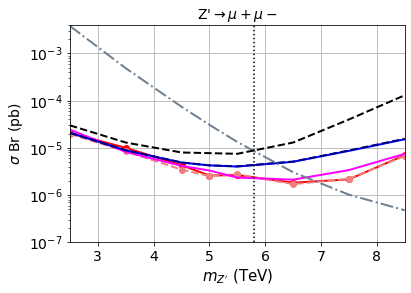

In [6]:
# Other parameters
madgraph_theory_mumu = [5.014e-3,6.303e-4,9.727e-5,4.079e-5,1.795e-5,4.324e-6,1.53e-6,7.458e-7] # for the dataset generated with m_{ll}>1800GeV
#madgraph_theory_mumu = [5.39e-3,7.2e-4,1.3e-4,6.25e-5,3.27e-5,1.18e-5,5.7e-6,7.458e-7] # for the dataset generated with m_{ll}>1800GeV
acceptance_mumu = [0.723034,0.734802,0.72851,0.720128,0.707437,0.672699,0.636719,0.612787] # for the dataset generated with m_{ll}>1800GeV
eff_cross_madgraph_mumu = [ k_factor *0.5 * a * b for a,b in zip(madgraph_theory_mumu,acceptance_mumu)] 

# From ATLAS
mZprime_mumu_ATLAS=[2.5,3.5,4.5,5.5,6.5,7.5,8.5]
ATLAS_cross_95CL_mumu = [3e-5,1.3e-5,8e-6,7.5e-6,1.3e-5,4e-5,1.3e-4]
ATLAS_cross_95CL_mumu = [ 1.0 * a for a in ATLAS_cross_95CL_mumu] # correction

plt.figure()
lw = 2

plt.plot(mZprime_mumu, all_cross_XG_MLL_95CL_mumu, 'o-', color='red', lw=lw, label=r'MLL+KDE (10ML)')
plt.plot(mZprime_mumu, all_cross_XG_MLL_1ML_95CL_mumu, 'o--', color='lightcoral', lw=lw, label=r'MLL+KDE (10ML)')
plt.plot(mZprime_mumu, all_cross_bins_logbins_95CL_mumu, '-', color='magenta', lw=lw, label=r'$\bar{x}$ BL (15 log l.bins)') 
plt.plot(mZprime_mumu, all_cross_bins_XG_95CL_mumu, '-', color='blue', lw=lw, label=r'$o(\bar{x})$ BL (15 l.bins) (10ML)')
plt.plot(mZprime_mumu, all_cross_bins_XG_1ML_95CL_mumu, '--', color='navy', lw=lw, label=r'$o(\bar{x})$ BL (15 l.bins) (1ML)')
plt.plot(mZprime_mumu, eff_cross_madgraph_mumu, '-.', color='slategray', lw=lw, label=r'MG $\sigma_{eff}$ theory')
plt.plot(mZprime_mumu_ATLAS, ATLAS_cross_95CL_mumu, '--', color='black', lw=lw, label=r'ATLAS $\sigma$ upper limit')
plt.vlines(x = 5.8, ymin = 1e-7, ymax = 1e-2, linestyles='dotted', color='black', label="ATLAS $m_{Z'}$ upper limit")

plt.xlim([2.5, 8.5])
plt.ylim([1e-7, 4e-3])
plt.yscale('log')
plt.xlabel("$m_{Z'}$ (TeV)", fontsize=15)
plt.ylabel('$\sigma$ Br (pb)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r"Z'$\rightarrow \mu + \mu -$",fontsize=14) 
#plt.legend(loc="upper right", fontsize=12)
plt.show()

In [7]:
3*0.35

1.0499999999999998

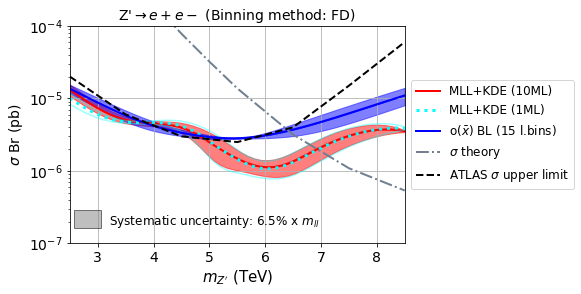

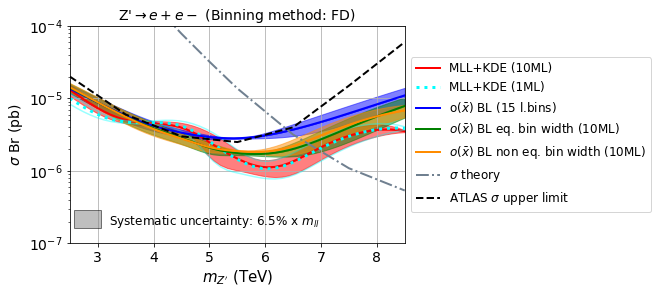

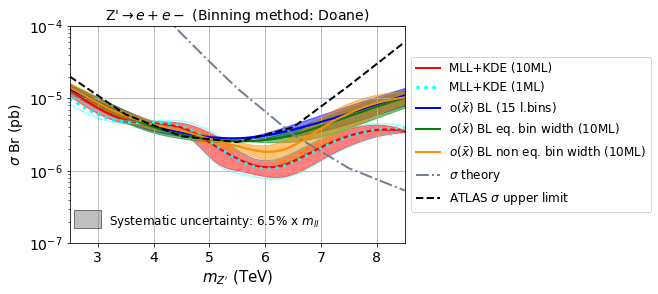

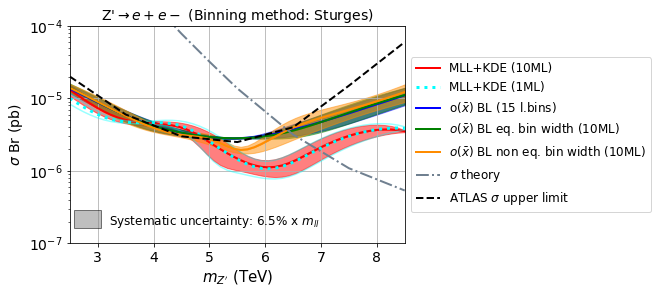

In [26]:
# Interpolation, cubic
fcubic_all_cross_bins_logbins_95CL_ee = interp1d(mZprime_ee, all_cross_bins_logbins_95CL_ee, kind='cubic')
fcubic_all_cross_bins_XG_1ML_95CL_ee = interp1d(mZprime_ee, all_cross_bins_XG_1ML_95CL_ee, kind='cubic')
fcubic_all_cross_XG_MLL_1ML_95CL_ee = interp1d(mZprime_ee, all_cross_XG_MLL_1ML_95CL_ee, kind='cubic')
fcubic_all_cross_bins_XG_95CL_ee = interp1d(mZprime_ee, all_cross_bins_XG_95CL_ee, kind='cubic')
fcubic_all_cross_XG_MLL_95CL_ee = interp1d(mZprime_ee, all_cross_XG_MLL_95CL_ee, kind='cubic')
fcubic_all_cross_BL_CV0_zeros_95CL_ee = interp1d(mZprime_ee, all_cross_BL_CV0_zeros_95CL_ee, kind='cubic')
fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee = interp1d(mZprime_ee, all_cross_BL_CV0_poiss_zeros_95CL_ee, kind='cubic')
fcubic_all_cross_BL_CV1_zeros_95CL_ee = interp1d(mZprime_ee, all_cross_BL_CV1_zeros_95CL_ee, kind='cubic')
fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee = interp1d(mZprime_ee, all_cross_BL_CV1_poiss_zeros_95CL_ee, kind='cubic')
fcubic_all_cross_BL_CV2_zeros_95CL_ee = interp1d(mZprime_ee, all_cross_BL_CV2_zeros_95CL_ee, kind='cubic')
fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee = interp1d(mZprime_ee, all_cross_BL_CV2_poiss_zeros_95CL_ee, kind='cubic')



# Calculate the error band: error*100% m_{ll}
error = 0.065

############
# ERROR UP #
############
all_cross_bins_logbins_95CL_ee_err_up = [ abs( fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_bins_logbins_95CL_ee_err_up.append( abs(fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[i]) )
all_cross_bins_logbins_95CL_ee_err_up.append( abs( fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[-1]) )

all_cross_bins_XG_1ML_95CL_ee_err_up = [ abs( fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_bins_XG_1ML_95CL_ee_err_up.append( abs(fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[i]) )
all_cross_bins_XG_1ML_95CL_ee_err_up.append( abs( fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[-1]) )

all_cross_XG_MLL_1ML_95CL_ee_err_up = [ abs( fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_XG_MLL_1ML_95CL_ee_err_up.append( abs(fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[i]) )
all_cross_XG_MLL_1ML_95CL_ee_err_up.append( abs( fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[-1]) )

all_cross_bins_XG_95CL_ee_err_up = [ abs( fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_bins_XG_95CL_ee_err_up.append( abs(fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[i]) )
all_cross_bins_XG_95CL_ee_err_up.append( abs( fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[-1]) )

all_cross_XG_MLL_95CL_ee_err_up = [ abs( fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_XG_MLL_95CL_ee_err_up.append( abs(fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[i]) )
all_cross_XG_MLL_95CL_ee_err_up.append( abs( fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV0_zeros_95CL_ee_err_up = [ abs( fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV0_zeros_95CL_ee_err_up.append( abs(fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV0_zeros_95CL_ee_err_up.append( abs( fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV0_poiss_zeros_95CL_ee_err_up = [ abs( fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV0_poiss_zeros_95CL_ee_err_up.append( abs(fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV0_poiss_zeros_95CL_ee_err_up.append( abs( fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV1_zeros_95CL_ee_err_up = [ abs( fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV1_zeros_95CL_ee_err_up.append( abs(fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV1_zeros_95CL_ee_err_up.append( abs( fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV1_poiss_zeros_95CL_ee_err_up = [ abs( fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV1_poiss_zeros_95CL_ee_err_up.append( abs(fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV1_poiss_zeros_95CL_ee_err_up.append( abs( fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV2_zeros_95CL_ee_err_up = [ abs( fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV2_zeros_95CL_ee_err_up.append( abs(fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV2_zeros_95CL_ee_err_up.append( abs( fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV2_poiss_zeros_95CL_ee_err_up = [ abs( fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV2_poiss_zeros_95CL_ee_err_up.append( abs(fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV2_poiss_zeros_95CL_ee_err_up.append( abs( fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[-1]) )


##############
# ERROR DOWN #
##############
all_cross_bins_logbins_95CL_ee_err_down = [ -abs( fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_bins_logbins_95CL_ee_err_down.append( -abs(fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[i]) )
all_cross_bins_logbins_95CL_ee_err_down.append( -abs( fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_bins_logbins_95CL_ee(mZprime_ee[-1]) )

all_cross_bins_XG_1ML_95CL_ee_err_down = [ -abs( fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_bins_XG_1ML_95CL_ee_err_down.append( -abs(fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[i]) )
all_cross_bins_XG_1ML_95CL_ee_err_down.append( -abs( fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_bins_XG_1ML_95CL_ee(mZprime_ee[-1]) )

all_cross_XG_MLL_1ML_95CL_ee_err_down = [ -abs( fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_XG_MLL_1ML_95CL_ee_err_down.append( -abs(fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[i]) )
all_cross_XG_MLL_1ML_95CL_ee_err_down.append( -abs( fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_XG_MLL_1ML_95CL_ee(mZprime_ee[-1]) )

all_cross_bins_XG_95CL_ee_err_down = [ -abs( fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_bins_XG_95CL_ee_err_down.append( -abs(fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[i]) )
all_cross_bins_XG_95CL_ee_err_down.append( -abs( fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_bins_XG_95CL_ee(mZprime_ee[-1]) )

all_cross_XG_MLL_95CL_ee_err_down = [ -abs( fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_XG_MLL_95CL_ee_err_down.append( -abs(fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[i]) )
all_cross_XG_MLL_95CL_ee_err_down.append( -abs( fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_XG_MLL_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV0_zeros_95CL_ee_err_down = [ -abs( fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV0_zeros_95CL_ee_err_down.append( -abs(fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV0_zeros_95CL_ee_err_down.append( -abs( fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV0_zeros_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV0_poiss_zeros_95CL_ee_err_down = [ -abs( fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV0_poiss_zeros_95CL_ee_err_down.append( -abs(fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV0_poiss_zeros_95CL_ee_err_down.append( -abs( fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV1_zeros_95CL_ee_err_down = [ -abs( fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV1_zeros_95CL_ee_err_down.append( -abs(fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV1_zeros_95CL_ee_err_down.append( -abs( fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV1_zeros_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV1_poiss_zeros_95CL_ee_err_down = [ -abs( fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV1_poiss_zeros_95CL_ee_err_down.append( -abs(fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV1_poiss_zeros_95CL_ee_err_down.append( -abs( fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV2_zeros_95CL_ee_err_down = [ -abs( fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV2_zeros_95CL_ee_err_down.append( -abs(fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV2_zeros_95CL_ee_err_down.append( -abs( fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV2_zeros_95CL_ee(mZprime_ee[-1]) )

all_cross_BL_CV2_poiss_zeros_95CL_ee_err_down = [ -abs( fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[0] * (1+error)) - fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[0]) ) + fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[0]) ]
for i in range(1,len(mZprime_ee[1:])):
    all_cross_BL_CV2_poiss_zeros_95CL_ee_err_down.append( -abs(fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[i] * (1-(error/2))) - fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[i] * (1+(error/2)))) +fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[i]) )
all_cross_BL_CV2_poiss_zeros_95CL_ee_err_down.append( -abs( fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[-1] * (1-error)) - fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[-1]) ) + fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(mZprime_ee[-1]) )



# Interpolation, cubic
fcubic_all_cross_bins_logbins_95CL_ee_err_up = interp1d(mZprime_ee, all_cross_bins_logbins_95CL_ee_err_up, kind='cubic')
fcubic_all_cross_bins_XG_1ML_95CL_ee_err_up = interp1d(mZprime_ee, all_cross_bins_XG_1ML_95CL_ee_err_up, kind='quadratic')
fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_up = interp1d(mZprime_ee, all_cross_XG_MLL_1ML_95CL_ee_err_up, kind='cubic')
fcubic_all_cross_bins_XG_95CL_ee_err_up = interp1d(mZprime_ee, all_cross_bins_XG_95CL_ee_err_up, kind='cubic')
fcubic_all_cross_XG_MLL_95CL_ee_err_up = interp1d(mZprime_ee, all_cross_XG_MLL_95CL_ee_err_up, kind='cubic')
fcubic_all_cross_BL_CV0_zeros_95CL_ee_err_up = interp1d(mZprime_ee, all_cross_BL_CV0_zeros_95CL_ee_err_up, kind='cubic')
fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee_err_up = interp1d(mZprime_ee, all_cross_BL_CV0_poiss_zeros_95CL_ee_err_up, kind='cubic')
fcubic_all_cross_BL_CV1_zeros_95CL_ee_err_up = interp1d(mZprime_ee, all_cross_BL_CV1_zeros_95CL_ee_err_up, kind='cubic')
fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee_err_up = interp1d(mZprime_ee, all_cross_BL_CV1_poiss_zeros_95CL_ee_err_up, kind='cubic')
fcubic_all_cross_BL_CV2_zeros_95CL_ee_err_up = interp1d(mZprime_ee, all_cross_BL_CV2_zeros_95CL_ee_err_up, kind='cubic')
fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee_err_up = interp1d(mZprime_ee, all_cross_BL_CV2_poiss_zeros_95CL_ee_err_up, kind='cubic')

fcubic_all_cross_bins_logbins_95CL_ee_err_down = interp1d(mZprime_ee, all_cross_bins_logbins_95CL_ee_err_down, kind='cubic')
fcubic_all_cross_bins_XG_1ML_95CL_ee_err_down = interp1d(mZprime_ee, all_cross_bins_XG_1ML_95CL_ee_err_down, kind='quadratic')
fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_down = interp1d(mZprime_ee, all_cross_XG_MLL_1ML_95CL_ee_err_down, kind='cubic')
fcubic_all_cross_bins_XG_95CL_ee_err_down = interp1d(mZprime_ee, all_cross_bins_XG_95CL_ee_err_down, kind='cubic')
fcubic_all_cross_XG_MLL_95CL_ee_err_down = interp1d(mZprime_ee, all_cross_XG_MLL_95CL_ee_err_down, kind='cubic')
fcubic_all_cross_BL_CV0_zeros_95CL_ee_err_down = interp1d(mZprime_ee, all_cross_BL_CV0_zeros_95CL_ee_err_down, kind='cubic')
fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee_err_down = interp1d(mZprime_ee, all_cross_BL_CV0_poiss_zeros_95CL_ee_err_down, kind='cubic')
fcubic_all_cross_BL_CV1_zeros_95CL_ee_err_down = interp1d(mZprime_ee, all_cross_BL_CV1_zeros_95CL_ee_err_down, kind='cubic')
fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee_err_down = interp1d(mZprime_ee, all_cross_BL_CV1_poiss_zeros_95CL_ee_err_down, kind='cubic')
fcubic_all_cross_BL_CV2_zeros_95CL_ee_err_down = interp1d(mZprime_ee, all_cross_BL_CV2_zeros_95CL_ee_err_down, kind='cubic')
fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee_err_down = interp1d(mZprime_ee, all_cross_BL_CV2_poiss_zeros_95CL_ee_err_down, kind='cubic')




# x to plot
plotX = np.linspace(min(mZprime_ee), max(mZprime_ee), num=50, endpoint=True)


plt.figure()
lw = 2

#plt.plot(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), '-', color='magenta', lw=2, label=r'$\bar{x}$ BL (15 log l.bins)',zorder=0) 
#plt.fill_between(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), fcubic_all_cross_bins_logbins_95CL_ee_err_up(plotX), color='magenta', alpha=0.5,zorder=0)
#plt.fill_between(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), fcubic_all_cross_bins_logbins_95CL_ee_err_down(plotX), color='magenta', alpha=0.5,zorder=0)
plt.plot(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), '-', color='red', lw=2, label=r'MLL+KDE (10ML)')

plt.fill_between(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), fcubic_all_cross_XG_MLL_95CL_ee_err_up(plotX), color='red', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), fcubic_all_cross_XG_MLL_95CL_ee_err_down(plotX), color='red', alpha=0.5)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), ':', color='cyan', lw=3, label=r'MLL+KDE (1ML)')
#plt.fill_between(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_up(plotX), color='darkorange', alpha=0.3)
#plt.fill_between(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_down(plotX), color='darkorange', alpha=0.3)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_up(plotX), color='cyan', alpha=0.4)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_down(plotX), color='cyan', alpha=0.4)
plt.plot(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), '-', color='blue', lw=2, label=r'o($\bar{x}$) BL (15 l.bins)')
plt.fill_between(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), fcubic_all_cross_bins_XG_95CL_ee_err_up(plotX), color='blue', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), fcubic_all_cross_bins_XG_95CL_ee_err_down(plotX), color='blue', alpha=0.5)
#plt.plot(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), '-', color='dodgerblue', lw=2, label=r'o($\bar{x}$) BL (15 l.bins) (1ML)')
#plt.fill_between(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), fcubic_all_cross_bins_XG_1ML_95CL_ee_err_up(plotX), color='dodgerblue', alpha=0.5)
#plt.fill_between(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), fcubic_all_cross_bins_XG_1ML_95CL_ee_err_down(plotX), color='dodgerblue', alpha=0.5)
# plt.plot(plotX, fcubic_all_cross_BL_CV0_zeros_95CL_ee(plotX), '-', color='green', lw=2, label=r'$o(\bar{x})$ BL eq. bin width (10ML)')
# plt.fill_between(plotX, fcubic_all_cross_BL_CV0_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV0_zeros_95CL_ee_err_up(plotX), color='green', alpha=0.5)
# plt.fill_between(plotX, fcubic_all_cross_BL_CV0_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV0_zeros_95CL_ee_err_down(plotX), color='green', alpha=0.5)
# plt.plot(plotX, fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(plotX), '-', color='darkorange', lw=2, label=r'$o(\bar{x})$ BL non eq. bin width (10ML)')
# plt.fill_between(plotX, fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee_err_up(plotX), color='darkorange', alpha=0.5)
# plt.fill_between(plotX, fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee_err_down(plotX), color='darkorange', alpha=0.5)

plt.plot(mZprime_ee, eff_cross_madgraph_ee, '-.', color='slategray', lw=lw, label=r'$\sigma$ theory')
plt.plot(mZprime_ee_ATLAS, ATLAS_cross_95CL_ee, '--', color='black', lw=lw, label=r'ATLAS $\sigma$ upper limit')
#plt.vlines(x = 6.4, ymin = 1e-7, ymax = 1e-2, linestyles='dotted', color='black', label="ATLAS $m_{Z'}$ upper limit")

plt.xlim([2.5, 8.5])
plt.ylim([1e-7, 1e-4])
plt.yscale('log')
plt.xlabel("$m_{Z'}$ (TeV)", fontsize=15)
plt.ylabel('$\sigma$ Br (pb)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r"Z'$\rightarrow e + e-$ (Binning method: FD)",fontsize=14) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.text(2.65, 2e-7, "      ", bbox=dict(facecolor='gray', alpha=0.5))
plt.text(3.2, 1.8e-7, "Systematic uncertainty: 6.5% x $m_{ll}$",{'fontsize': 12})
plt.savefig('images/' + 'cross-section-upper-limits-ee.pdf', format="pdf", bbox_inches="tight")
plt.show()



plt.figure()
lw = 2

#plt.plot(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), '-', color='magenta', lw=2, label=r'$\bar{x}$ BL (15 log l.bins)',zorder=0) 
#plt.fill_between(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), fcubic_all_cross_bins_logbins_95CL_ee_err_up(plotX), color='magenta', alpha=0.5,zorder=0)
#plt.fill_between(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), fcubic_all_cross_bins_logbins_95CL_ee_err_down(plotX), color='magenta', alpha=0.5,zorder=0)
plt.plot(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), '-', color='red', lw=2, label=r'MLL+KDE (10ML)')

plt.fill_between(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), fcubic_all_cross_XG_MLL_95CL_ee_err_up(plotX), color='red', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), fcubic_all_cross_XG_MLL_95CL_ee_err_down(plotX), color='red', alpha=0.5)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), ':', color='cyan', lw=3, label=r'MLL+KDE (1ML)')
#plt.fill_between(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_up(plotX), color='darkorange', alpha=0.3)
#plt.fill_between(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_down(plotX), color='darkorange', alpha=0.3)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_up(plotX), color='cyan', alpha=0.4)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_down(plotX), color='cyan', alpha=0.4)
plt.plot(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), '-', color='blue', lw=2, label=r'o($\bar{x}$) BL (15 l.bins)')
plt.fill_between(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), fcubic_all_cross_bins_XG_95CL_ee_err_up(plotX), color='blue', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), fcubic_all_cross_bins_XG_95CL_ee_err_down(plotX), color='blue', alpha=0.5)
#plt.plot(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), '-', color='dodgerblue', lw=2, label=r'o($\bar{x}$) BL (15 l.bins) (1ML)')
#plt.fill_between(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), fcubic_all_cross_bins_XG_1ML_95CL_ee_err_up(plotX), color='dodgerblue', alpha=0.5)
#plt.fill_between(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), fcubic_all_cross_bins_XG_1ML_95CL_ee_err_down(plotX), color='dodgerblue', alpha=0.5)
plt.plot(plotX, fcubic_all_cross_BL_CV0_zeros_95CL_ee(plotX), '-', color='green', lw=2, label=r'$o(\bar{x})$ BL eq. bin width (10ML)')
plt.fill_between(plotX, fcubic_all_cross_BL_CV0_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV0_zeros_95CL_ee_err_up(plotX), color='green', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_BL_CV0_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV0_zeros_95CL_ee_err_down(plotX), color='green', alpha=0.5)
plt.plot(plotX, fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(plotX), '-', color='darkorange', lw=2, label=r'$o(\bar{x})$ BL non eq. bin width (10ML)')
plt.fill_between(plotX, fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee_err_up(plotX), color='darkorange', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV0_poiss_zeros_95CL_ee_err_down(plotX), color='darkorange', alpha=0.5)

plt.plot(mZprime_ee, eff_cross_madgraph_ee, '-.', color='slategray', lw=lw, label=r'$\sigma$ theory')
plt.plot(mZprime_ee_ATLAS, ATLAS_cross_95CL_ee, '--', color='black', lw=lw, label=r'ATLAS $\sigma$ upper limit')
#plt.vlines(x = 6.4, ymin = 1e-7, ymax = 1e-2, linestyles='dotted', color='black', label="ATLAS $m_{Z'}$ upper limit")

plt.xlim([2.5, 8.5])
plt.ylim([1e-7, 1e-4])
plt.yscale('log')
plt.xlabel("$m_{Z'}$ (TeV)", fontsize=15)
plt.ylabel('$\sigma$ Br (pb)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r"Z'$\rightarrow e + e-$ (Binning method: FD)",fontsize=14) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.text(2.65, 2e-7, "      ", bbox=dict(facecolor='gray', alpha=0.5))
plt.text(3.2, 1.8e-7, "Systematic uncertainty: 6.5% x $m_{ll}$",{'fontsize': 12})
plt.savefig('images/' + 'cross-section-upper-limits-FD-ee.pdf', format="pdf", bbox_inches="tight")
plt.show()



plt.figure()
lw = 2

#plt.plot(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), '-', color='magenta', lw=2, label=r'$\bar{x}$ BL (15 log l.bins)',zorder=0) 
#plt.fill_between(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), fcubic_all_cross_bins_logbins_95CL_ee_err_up(plotX), color='magenta', alpha=0.5,zorder=0)
#plt.fill_between(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), fcubic_all_cross_bins_logbins_95CL_ee_err_down(plotX), color='magenta', alpha=0.5,zorder=0)
plt.plot(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), '-', color='red', lw=2, label=r'MLL+KDE (10ML)')

plt.fill_between(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), fcubic_all_cross_XG_MLL_95CL_ee_err_up(plotX), color='red', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), fcubic_all_cross_XG_MLL_95CL_ee_err_down(plotX), color='red', alpha=0.5)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), ':', color='cyan', lw=3, label=r'MLL+KDE (1ML)')
#plt.fill_between(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_up(plotX), color='darkorange', alpha=0.3)
#plt.fill_between(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_down(plotX), color='darkorange', alpha=0.3)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_up(plotX), color='cyan', alpha=0.4)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_down(plotX), color='cyan', alpha=0.4)
plt.plot(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), '-', color='blue', lw=2, label=r'o($\bar{x}$) BL (15 l.bins)')
plt.fill_between(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), fcubic_all_cross_bins_XG_95CL_ee_err_up(plotX), color='blue', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), fcubic_all_cross_bins_XG_95CL_ee_err_down(plotX), color='blue', alpha=0.5)
#plt.plot(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), '-', color='dodgerblue', lw=2, label=r'o($\bar{x}$) BL (15 l.bins) (1ML)')
#plt.fill_between(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), fcubic_all_cross_bins_XG_1ML_95CL_ee_err_up(plotX), color='dodgerblue', alpha=0.5)
#plt.fill_between(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), fcubic_all_cross_bins_XG_1ML_95CL_ee_err_down(plotX), color='dodgerblue', alpha=0.5)
plt.plot(plotX, fcubic_all_cross_BL_CV1_zeros_95CL_ee(plotX), '-', color='green', lw=2, label=r'$o(\bar{x})$ BL eq. bin width (10ML)')
plt.fill_between(plotX, fcubic_all_cross_BL_CV1_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV1_zeros_95CL_ee_err_up(plotX), color='green', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_BL_CV1_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV1_zeros_95CL_ee_err_down(plotX), color='green', alpha=0.5)
plt.plot(plotX, fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(plotX), '-', color='darkorange', lw=2, label=r'$o(\bar{x})$ BL non eq. bin width (10ML)')
plt.fill_between(plotX, fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee_err_up(plotX), color='darkorange', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV1_poiss_zeros_95CL_ee_err_down(plotX), color='darkorange', alpha=0.5)

plt.plot(mZprime_ee, eff_cross_madgraph_ee, '-.', color='slategray', lw=lw, label=r'$\sigma$ theory')
plt.plot(mZprime_ee_ATLAS, ATLAS_cross_95CL_ee, '--', color='black', lw=lw, label=r'ATLAS $\sigma$ upper limit')
#plt.vlines(x = 6.4, ymin = 1e-7, ymax = 1e-2, linestyles='dotted', color='black', label="ATLAS $m_{Z'}$ upper limit")

plt.xlim([2.5, 8.5])
plt.ylim([1e-7, 1e-4])
plt.yscale('log')
plt.xlabel("$m_{Z'}$ (TeV)", fontsize=15)
plt.ylabel('$\sigma$ Br (pb)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r"Z'$\rightarrow e + e-$ (Binning method: Doane)",fontsize=14) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.text(2.65, 2e-7, "      ", bbox=dict(facecolor='gray', alpha=0.5))
plt.text(3.2, 1.8e-7, "Systematic uncertainty: 6.5% x $m_{ll}$",{'fontsize': 12})
plt.savefig('images/' + 'cross-section-upper-limits-doane-ee.pdf', format="pdf", bbox_inches="tight")
plt.show()




plt.figure()
lw = 2

#plt.plot(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), '-', color='magenta', lw=2, label=r'$\bar{x}$ BL (15 log l.bins)',zorder=0) 
#plt.fill_between(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), fcubic_all_cross_bins_logbins_95CL_ee_err_up(plotX), color='magenta', alpha=0.5,zorder=0)
#plt.fill_between(plotX, fcubic_all_cross_bins_logbins_95CL_ee(plotX), fcubic_all_cross_bins_logbins_95CL_ee_err_down(plotX), color='magenta', alpha=0.5,zorder=0)
plt.plot(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), '-', color='red', lw=2, label=r'MLL+KDE (10ML)')

plt.fill_between(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), fcubic_all_cross_XG_MLL_95CL_ee_err_up(plotX), color='red', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_XG_MLL_95CL_ee(plotX), fcubic_all_cross_XG_MLL_95CL_ee_err_down(plotX), color='red', alpha=0.5)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), ':', color='cyan', lw=3, label=r'MLL+KDE (1ML)')
#plt.fill_between(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_up(plotX), color='darkorange', alpha=0.3)
#plt.fill_between(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee(plotX), fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_down(plotX), color='darkorange', alpha=0.3)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_up(plotX), color='cyan', alpha=0.4)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_ee_err_down(plotX), color='cyan', alpha=0.4)
plt.plot(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), '-', color='blue', lw=2, label=r'o($\bar{x}$) BL (15 l.bins)')
plt.fill_between(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), fcubic_all_cross_bins_XG_95CL_ee_err_up(plotX), color='blue', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_bins_XG_95CL_ee(plotX), fcubic_all_cross_bins_XG_95CL_ee_err_down(plotX), color='blue', alpha=0.5)
#plt.plot(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), '-', color='dodgerblue', lw=2, label=r'o($\bar{x}$) BL (15 l.bins) (1ML)')
#plt.fill_between(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), fcubic_all_cross_bins_XG_1ML_95CL_ee_err_up(plotX), color='dodgerblue', alpha=0.5)
#plt.fill_between(plotX, fcubic_all_cross_bins_XG_1ML_95CL_ee(plotX), fcubic_all_cross_bins_XG_1ML_95CL_ee_err_down(plotX), color='dodgerblue', alpha=0.5)
plt.plot(plotX, fcubic_all_cross_BL_CV2_zeros_95CL_ee(plotX), '-', color='green', lw=2, label=r'$o(\bar{x})$ BL eq. bin width (10ML)')
plt.fill_between(plotX, fcubic_all_cross_BL_CV2_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV2_zeros_95CL_ee_err_up(plotX), color='green', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_BL_CV2_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV2_zeros_95CL_ee_err_down(plotX), color='green', alpha=0.5)
plt.plot(plotX, fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(plotX), '-', color='darkorange', lw=2, label=r'$o(\bar{x})$ BL non eq. bin width (10ML)')
plt.fill_between(plotX, fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee_err_up(plotX), color='darkorange', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee(plotX), fcubic_all_cross_BL_CV2_poiss_zeros_95CL_ee_err_down(plotX), color='darkorange', alpha=0.5)

plt.plot(mZprime_ee, eff_cross_madgraph_ee, '-.', color='slategray', lw=lw, label=r'$\sigma$ theory')
plt.plot(mZprime_ee_ATLAS, ATLAS_cross_95CL_ee, '--', color='black', lw=lw, label=r'ATLAS $\sigma$ upper limit')
#plt.vlines(x = 6.4, ymin = 1e-7, ymax = 1e-2, linestyles='dotted', color='black', label="ATLAS $m_{Z'}$ upper limit")

plt.xlim([2.5, 8.5])
plt.ylim([1e-7, 1e-4])
plt.yscale('log')
plt.xlabel("$m_{Z'}$ (TeV)", fontsize=15)
plt.ylabel('$\sigma$ Br (pb)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r"Z'$\rightarrow e + e-$ (Binning method: Sturges)",fontsize=14) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.text(2.65, 2e-7, "      ", bbox=dict(facecolor='gray', alpha=0.5))
plt.text(3.2, 1.8e-7, "Systematic uncertainty: 6.5% x $m_{ll}$",{'fontsize': 12})
plt.savefig('images/' + 'cross-section-upper-limits-sturges-ee.pdf', format="pdf", bbox_inches="tight")
plt.show()

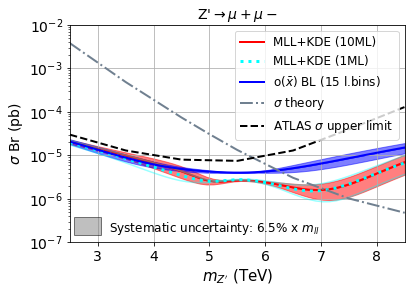

In [10]:
# Interpolation, cubic
fcubic_all_cross_bins_logbins_95CL_mumu = interp1d(mZprime_mumu, all_cross_bins_logbins_95CL_mumu, kind='cubic')
fcubic_all_cross_bins_XG_1ML_95CL_mumu = interp1d(mZprime_mumu, all_cross_bins_XG_1ML_95CL_mumu, kind='cubic')
fcubic_all_cross_XG_MLL_1ML_95CL_mumu = interp1d(mZprime_mumu, all_cross_XG_MLL_1ML_95CL_mumu, kind='cubic')
fcubic_all_cross_bins_XG_95CL_mumu = interp1d(mZprime_mumu, all_cross_bins_XG_95CL_mumu, kind='cubic')
fcubic_all_cross_XG_MLL_95CL_mumu = interp1d(mZprime_mumu, all_cross_XG_MLL_95CL_mumu, kind='cubic')



# Calculate the error band: error*100% m_{ll}
error = 0.065

############
# ERROR UP #
############
all_cross_bins_logbins_95CL_mumu_err_up = [ abs( fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[0] * (1+error)) - fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[0]) ) + fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[0]) ]
for i in range(1,len(mZprime_mumu[1:])):
    all_cross_bins_logbins_95CL_mumu_err_up.append( abs(fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[i] * (1-(error/2))) - fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[i] * (1+(error/2)))) +fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[i]) )
all_cross_bins_logbins_95CL_mumu_err_up.append( abs( fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[-1] * (1-error)) - fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[-1]) ) + fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[-1]) )

all_cross_bins_XG_1ML_95CL_mumu_err_up = [ abs( fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[0] * (1+error)) - fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[0]) ) + fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[0]) ]
for i in range(1,len(mZprime_mumu[1:])):
    all_cross_bins_XG_1ML_95CL_mumu_err_up.append( abs(fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[i] * (1-(error/2))) - fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[i] * (1+(error/2)))) +fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[i]) )
all_cross_bins_XG_1ML_95CL_mumu_err_up.append( abs( fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[-1] * (1-error)) - fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[-1]) ) + fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[-1]) )

all_cross_XG_MLL_1ML_95CL_mumu_err_up = [ abs( fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[0] * (1+error)) - fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[0]) ) + fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[0]) ]
for i in range(1,len(mZprime_mumu[1:])):
    all_cross_XG_MLL_1ML_95CL_mumu_err_up.append( abs(fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[i] * (1-(error/2))) - fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[i] * (1+(error/2)))) +fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[i]) )
all_cross_XG_MLL_1ML_95CL_mumu_err_up.append( abs( fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[-1] * (1-error)) - fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[-1]) ) + fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[-1]) )

all_cross_bins_XG_95CL_mumu_err_up = [ abs( fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[0] * (1+error)) - fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[0]) ) + fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[0]) ]
for i in range(1,len(mZprime_mumu[1:])):
    all_cross_bins_XG_95CL_mumu_err_up.append( abs(fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[i] * (1-(error/2))) - fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[i] * (1+(error/2)))) +fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[i]) )
all_cross_bins_XG_95CL_mumu_err_up.append( abs( fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[-1] * (1-error)) - fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[-1]) ) + fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[-1]) )

all_cross_XG_MLL_95CL_mumu_err_up = [ abs( fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[0] * (1+error)) - fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[0]) ) + fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[0]) ]
for i in range(1,len(mZprime_mumu[1:])):
    all_cross_XG_MLL_95CL_mumu_err_up.append( abs(fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[i] * (1-(error/2))) - fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[i] * (1+(error/2)))) +fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[i]) )
all_cross_XG_MLL_95CL_mumu_err_up.append( abs( fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[-1] * (1-error)) - fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[-1]) ) + fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[-1]) )


##############
# ERROR DOWN #
##############
all_cross_bins_logbins_95CL_mumu_err_down = [ -abs( fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[0] * (1+error)) - fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[0]) ) + fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[0]) ]
for i in range(1,len(mZprime_mumu[1:])):
    all_cross_bins_logbins_95CL_mumu_err_down.append( -abs(fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[i] * (1-(error/2))) - fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[i] * (1+(error/2)))) +fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[i]) )
all_cross_bins_logbins_95CL_mumu_err_down.append( -abs( fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[-1] * (1-error)) - fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[-1]) ) + fcubic_all_cross_bins_logbins_95CL_mumu(mZprime_mumu[-1]) )

all_cross_bins_XG_1ML_95CL_mumu_err_down = [ -abs( fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[0] * (1+error)) - fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[0]) ) + fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[0]) ]
for i in range(1,len(mZprime_mumu[1:])):
    all_cross_bins_XG_1ML_95CL_mumu_err_down.append( -abs(fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[i] * (1-(error/2))) - fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[i] * (1+(error/2)))) +fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[i]) )
all_cross_bins_XG_1ML_95CL_mumu_err_down.append( -abs( fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[-1] * (1-error)) - fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[-1]) ) + fcubic_all_cross_bins_XG_1ML_95CL_mumu(mZprime_mumu[-1]) )

all_cross_XG_MLL_1ML_95CL_mumu_err_down = [ -abs( fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[0] * (1+error)) - fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[0]) ) + fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[0]) ]
for i in range(1,len(mZprime_mumu[1:])):
    all_cross_XG_MLL_1ML_95CL_mumu_err_down.append( -abs(fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[i] * (1-(error/2))) - fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[i] * (1+(error/2)))) +fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[i]) )
all_cross_XG_MLL_1ML_95CL_mumu_err_down.append( -abs( fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[-1] * (1-error)) - fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[-1]) ) + fcubic_all_cross_XG_MLL_1ML_95CL_mumu(mZprime_mumu[-1]) )

all_cross_bins_XG_95CL_mumu_err_down = [ -abs( fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[0] * (1+error)) - fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[0]) ) + fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[0]) ]
for i in range(1,len(mZprime_mumu[1:])):
    all_cross_bins_XG_95CL_mumu_err_down.append( -abs(fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[i] * (1-(error/2))) - fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[i] * (1+(error/2)))) +fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[i]) )
all_cross_bins_XG_95CL_mumu_err_down.append( -abs( fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[-1] * (1-error)) - fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[-1]) ) + fcubic_all_cross_bins_XG_95CL_mumu(mZprime_mumu[-1]) )

all_cross_XG_MLL_95CL_mumu_err_down = [ -abs( fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[0] * (1+error)) - fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[0]) ) + fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[0]) ]
for i in range(1,len(mZprime_mumu[1:])):
    all_cross_XG_MLL_95CL_mumu_err_down.append( -abs(fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[i] * (1-(error/2))) - fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[i] * (1+(error/2)))) +fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[i]) )
all_cross_XG_MLL_95CL_mumu_err_down.append( -abs( fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[-1] * (1-error)) - fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[-1]) ) + fcubic_all_cross_XG_MLL_95CL_mumu(mZprime_mumu[-1]) )




# Interpolation, cubic
fcubic_all_cross_bins_logbins_95CL_mumu_err_up = interp1d(mZprime_mumu, all_cross_bins_logbins_95CL_mumu_err_up, kind='cubic')
fcubic_all_cross_bins_XG_1ML_95CL_mumu_err_up = interp1d(mZprime_mumu, all_cross_bins_XG_1ML_95CL_mumu_err_up, kind='cubic')
fcubic_all_cross_XG_MLL_1ML_95CL_mumu_err_up = interp1d(mZprime_mumu, all_cross_XG_MLL_1ML_95CL_mumu_err_up, kind='cubic')
fcubic_all_cross_bins_XG_95CL_mumu_err_up = interp1d(mZprime_mumu, all_cross_bins_XG_95CL_mumu_err_up, kind='cubic')
fcubic_all_cross_XG_MLL_95CL_mumu_err_up = interp1d(mZprime_mumu, all_cross_XG_MLL_95CL_mumu_err_up, kind='cubic')

fcubic_all_cross_bins_logbins_95CL_mumu_err_down = interp1d(mZprime_mumu, all_cross_bins_logbins_95CL_mumu_err_down, kind='cubic')
fcubic_all_cross_bins_XG_1ML_95CL_mumu_err_down = interp1d(mZprime_mumu, all_cross_bins_XG_1ML_95CL_mumu_err_down, kind='cubic')
fcubic_all_cross_XG_MLL_1ML_95CL_mumu_err_down = interp1d(mZprime_mumu, all_cross_XG_MLL_1ML_95CL_mumu_err_down, kind='cubic')
fcubic_all_cross_bins_XG_95CL_mumu_err_down = interp1d(mZprime_mumu, all_cross_bins_XG_95CL_mumu_err_down, kind='cubic')
fcubic_all_cross_XG_MLL_95CL_mumu_err_down = interp1d(mZprime_mumu, all_cross_XG_MLL_95CL_mumu_err_down, kind='cubic')




# x to plot
plotX = np.linspace(min(mZprime_mumu), max(mZprime_mumu), num=50, endpoint=True)


plt.figure()
lw = 2

#plt.plot(plotX, fcubic_all_cross_bins_logbins_95CL_mumu(plotX), '-', color='magenta', lw=2, label=r'$\bar{x}$ BL (15 log l.bins)',zorder=0) 
#plt.fill_between(plotX, fcubic_all_cross_bins_logbins_95CL_mumu(plotX), fcubic_all_cross_bins_logbins_95CL_mumu_err_up(plotX), color='magenta', alpha=0.5,zorder=0)
#plt.fill_between(plotX, fcubic_all_cross_bins_logbins_95CL_mumu(plotX), fcubic_all_cross_bins_logbins_95CL_mumu_err_down(plotX), color='magenta', alpha=0.5,zorder=0)
plt.plot(plotX, fcubic_all_cross_XG_MLL_95CL_mumu(plotX), '-', color='red', lw=2, label=r'MLL+KDE (10ML)')
plt.fill_between(plotX, fcubic_all_cross_XG_MLL_95CL_mumu(plotX), fcubic_all_cross_XG_MLL_95CL_mumu_err_up(plotX), color='red', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_XG_MLL_95CL_mumu(plotX), fcubic_all_cross_XG_MLL_95CL_mumu_err_down(plotX), color='red', alpha=0.5)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_mumu(plotX), ':', color='cyan', lw=3, label=r'MLL+KDE (1ML)')
#plt.fill_between(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_mumu(plotX), fcubic_all_cross_XG_MLL_1ML_95CL_mumu_err_up(plotX), color='cyan', alpha=0.3)
#plt.fill_between(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_mumu(plotX), fcubic_all_cross_XG_MLL_1ML_95CL_mumu_err_down(plotX), color='cyan', alpha=0.3)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_mumu_err_up(plotX), color='cyan', alpha=0.4)
plt.plot(plotX, fcubic_all_cross_XG_MLL_1ML_95CL_mumu_err_down(plotX), color='cyan', alpha=0.4)
plt.plot(plotX, fcubic_all_cross_bins_XG_95CL_mumu(plotX), '-', color='blue', lw=2, label=r'o($\bar{x}$) BL (15 l.bins)')
plt.fill_between(plotX, fcubic_all_cross_bins_XG_95CL_mumu(plotX), fcubic_all_cross_bins_XG_95CL_mumu_err_up(plotX), color='blue', alpha=0.5)
plt.fill_between(plotX, fcubic_all_cross_bins_XG_95CL_mumu(plotX), fcubic_all_cross_bins_XG_95CL_mumu_err_down(plotX), color='blue', alpha=0.5)
#plt.plot(plotX, fcubic_all_cross_bins_XG_1ML_95CL_mumu(plotX), '-', color='dodgerblue', lw=2, label=r'o($\bar{x}$) BL (15 l.bins) (10ML)')
#plt.fill_between(plotX, fcubic_all_cross_bins_XG_1ML_95CL_mumu(plotX), fcubic_all_cross_bins_XG_1ML_95CL_mumu_err_up(plotX), color='dodgerblue', alpha=0.5)
#plt.fill_between(plotX, fcubic_all_cross_bins_XG_1ML_95CL_mumu(plotX), fcubic_all_cross_bins_XG_1ML_95CL_mumu_err_down(plotX), color='dodgerblue', alpha=0.5)
plt.plot(mZprime_mumu, eff_cross_madgraph_mumu, '-.', color='slategray', lw=lw, label=r'$\sigma$ theory')
plt.plot(mZprime_mumu_ATLAS, ATLAS_cross_95CL_mumu, '--', color='black', lw=lw, label=r'ATLAS $\sigma$ upper limit')
#plt.vlines(x = 5.8, ymin = 1e-7, ymax = 1e-2, linestyles='dotted', color='black', label="ATLAS $m_{Z'}$ upper limit")

plt.xlim([2.5, 8.5])
plt.ylim([1e-7, 1e-2])
plt.yscale('log')
plt.xlabel("$m_{Z'}$ (TeV)", fontsize=15)
plt.ylabel('$\sigma$ Br (pb)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r"Z'$\rightarrow \mu + \mu -$",fontsize=14) 
plt.legend(loc="upper right", fontsize=12)
plt.text(2.65, 2e-7, "      ", bbox=dict(facecolor='gray', alpha=0.5))
plt.text(3.2, 1.8e-7, "Systematic uncertainty: 6.5% x $m_{ll}$",{'fontsize': 12})
plt.savefig('images/' + 'cross-section-upper-limits-mumu.pdf', format="pdf", bbox_inches="tight")
plt.show()